# Classifying Fashion-MNIST

Now it's your turn to build a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [63]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

Here we can see one of the images.

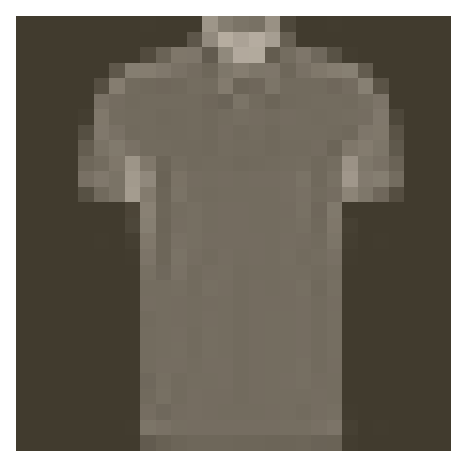

In [64]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [65]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [66]:
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 196, 49, 10 units each
        self.fc1 = nn.Linear(784, 392)
        self.fc2 = nn.Linear(392, 196)
        # Output layer, 10 units - one for each fashion class
        self.fc3 = nn.Linear(196, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits, dim=1)
        

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [67]:
# TODO: Create the network, define the criterion and optimizer
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 5
print_every = 50
steps = 0

In [68]:
# Train the network

for epoch in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        
        # Convert 2D-images into 1D-input-vector
        images.resize_(images.size()[0], 28*28)
        
        # Wrap into Variables and clear gradients
        inputs = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        
        # Forward pass
        output = model.forward(inputs)  # Forward pass
        loss = criterion(output, targets)  # Calculate loss for current batch
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()  # Accumulate loss for observation purposes
        if steps%print_every == 0:
            print('Epoch {}/{} - loss: {}'.format(epoch+1, epochs, running_loss/print_every))
            running_loss = 0


Epoch 1/5 - loss: 2.3025258016586303
Epoch 1/5 - loss: 2.2819437074661253
Epoch 1/5 - loss: 2.263685550689697
Epoch 1/5 - loss: 2.2428577852249147
Epoch 1/5 - loss: 2.2228684329986574
Epoch 1/5 - loss: 2.2055250883102415
Epoch 1/5 - loss: 2.1880120706558226
Epoch 1/5 - loss: 2.1685804986953734
Epoch 1/5 - loss: 2.151423134803772
Epoch 1/5 - loss: 2.132169237136841
Epoch 1/5 - loss: 2.1017763233184814
Epoch 1/5 - loss: 2.064196593761444
Epoch 1/5 - loss: 2.049501874446869
Epoch 1/5 - loss: 2.0268901872634886
Epoch 1/5 - loss: 1.9885952258110047
Epoch 1/5 - loss: 1.9757899641990662
Epoch 1/5 - loss: 1.9471840357780457
Epoch 1/5 - loss: 1.9203691673278809
Epoch 1/5 - loss: 1.8733065056800842
Epoch 1/5 - loss: 1.8469381856918334
Epoch 1/5 - loss: 1.8265555787086487
Epoch 1/5 - loss: 1.7787345194816588
Epoch 1/5 - loss: 1.7591019344329835
Epoch 1/5 - loss: 1.6938858103752137
Epoch 1/5 - loss: 1.667955093383789
Epoch 1/5 - loss: 1.6502118611335754
Epoch 1/5 - loss: 1.620554006099701
Epoch 1/

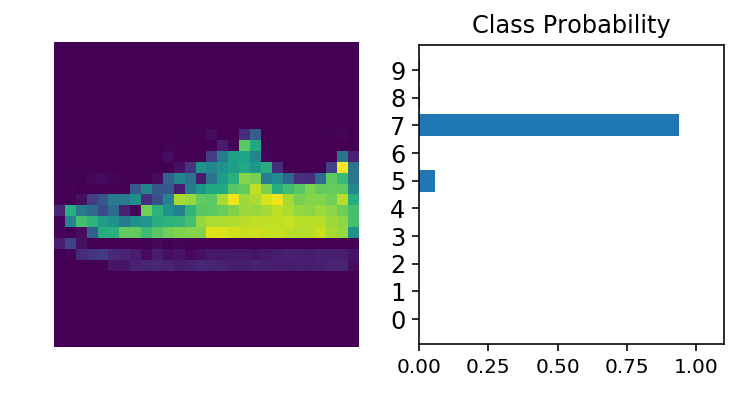

In [70]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(model.forward(Variable(img)), dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps)

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.